In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from torch.autograd import Variable

In [2]:
LR = 0.01
BATCH_SIZE = 64
EPOCH = 200

In [3]:
df = pd.read_csv('./ml-latest-small/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
from sklearn import model_selection as ms
train_set, test_set = ms.train_test_split(df, test_size=0.25)
len(train_set), len(test_set)

(75627, 25209)

In [5]:
training_set = np.array(train_set, dtype = 'int')
testing_set = np.array(test_set, dtype = 'int')

In [6]:
num_users = df.userId.unique().shape[0]
num_items = df.movieId.unique().shape[0]
num_users, num_items

(610, 9724)

In [7]:
movie_movieId = df.movieId.unique().tolist()
movie_movieId.sort()
d = dict()
for i in range(0, len(movie_movieId)):
    d[movie_movieId[i]] = i

In [8]:
def user_item_matrix(data):
    ratings = np.zeros((num_users, num_items))
    for row in data.itertuples():
        ratings[row[1]-1, d[row[2]]] = row[3]
    return ratings

In [9]:
ratings = user_item_matrix(df)
train = user_item_matrix(train_set)
test = user_item_matrix(test_set)

In [10]:
train = torch.FloatTensor(train)
input = Variable(train).unsqueeze(0)
input.shape

torch.Size([1, 610, 9724])

In [11]:
train = torch.FloatTensor(train)
test = torch.FloatTensor(test)
input = Variable(train).unsqueeze(0)
target = input
torch_dataset = Data.TensorDataset(input, target)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)

In [12]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_items, 50)
        self.fc2 = nn.Linear(50, 10)
        self.fc3 = nn.Linear(10, 50)
        self.fc4 = nn.Linear(50, num_items)
        self.activation = nn.Sigmoid()
        self.activation_t = nn.Tanh()
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation_t(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

In [13]:
net = Net()
loss_func = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=LR, betas=(0.9, 0.99))

In [14]:
loss_his = []
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(loader): 
        # for each training step
        output = net(b_x)  
        output[target == 0] = 0
        # get output for every net
        loss = loss_func(output, b_y)  # compute loss for every net
        opt.zero_grad()                # clear gradients for next train
        loss.backward()                # backpropagation, compute gradients
        opt.step()                     # apply gradients
        loss_his.append(loss.data.numpy())     # loss recoder
        print('Epoch: ', epoch, '| Step: ', step, '| train loss: ', loss.data.numpy())

Epoch:  0 | Step:  0 | train loss:  0.1702916
Epoch:  1 | Step:  0 | train loss:  0.14813638
Epoch:  2 | Step:  0 | train loss:  0.12692446
Epoch:  3 | Step:  0 | train loss:  0.10671682
Epoch:  4 | Step:  0 | train loss:  0.087602094
Epoch:  5 | Step:  0 | train loss:  0.06969054
Epoch:  6 | Step:  0 | train loss:  0.053416368
Epoch:  7 | Step:  0 | train loss:  0.0392434
Epoch:  8 | Step:  0 | train loss:  0.027750334
Epoch:  9 | Step:  0 | train loss:  0.01944416
Epoch:  10 | Step:  0 | train loss:  0.014609699
Epoch:  11 | Step:  0 | train loss:  0.013134861
Epoch:  12 | Step:  0 | train loss:  0.014381994
Epoch:  13 | Step:  0 | train loss:  0.017197138
Epoch:  14 | Step:  0 | train loss:  0.020242684
Epoch:  15 | Step:  0 | train loss:  0.022478366
Epoch:  16 | Step:  0 | train loss:  0.023387387
Epoch:  17 | Step:  0 | train loss:  0.0229214
Epoch:  18 | Step:  0 | train loss:  0.021348404
Epoch:  19 | Step:  0 | train loss:  0.01909379
Epoch:  20 | Step:  0 | train loss:  0.016

Epoch:  167 | Step:  0 | train loss:  0.009637507
Epoch:  168 | Step:  0 | train loss:  0.009637487
Epoch:  169 | Step:  0 | train loss:  0.009637466
Epoch:  170 | Step:  0 | train loss:  0.009637444
Epoch:  171 | Step:  0 | train loss:  0.009637423
Epoch:  172 | Step:  0 | train loss:  0.0096374005
Epoch:  173 | Step:  0 | train loss:  0.009637378
Epoch:  174 | Step:  0 | train loss:  0.009637355
Epoch:  175 | Step:  0 | train loss:  0.009637331
Epoch:  176 | Step:  0 | train loss:  0.009637305
Epoch:  177 | Step:  0 | train loss:  0.009637278
Epoch:  178 | Step:  0 | train loss:  0.009637249
Epoch:  179 | Step:  0 | train loss:  0.00963722
Epoch:  180 | Step:  0 | train loss:  0.009637188
Epoch:  181 | Step:  0 | train loss:  0.009637156
Epoch:  182 | Step:  0 | train loss:  0.009637121
Epoch:  183 | Step:  0 | train loss:  0.009637084
Epoch:  184 | Step:  0 | train loss:  0.009637046
Epoch:  185 | Step:  0 | train loss:  0.009637005
Epoch:  186 | Step:  0 | train loss:  0.009636963


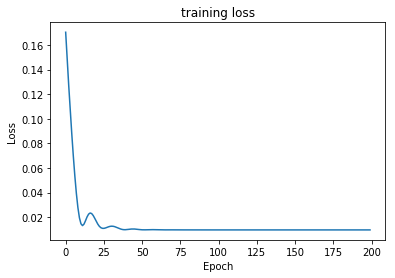

In [15]:
plt.plot(range(EPOCH), loss_his)
plt.title('training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
test_var = Variable(test).unsqueeze(0)
out = net(test_var)
out

tensor([[[3.9552, 3.4565, 3.4023,  ..., 3.4995, 3.4986, 3.9993],
         [3.9544, 3.4603, 3.4020,  ..., 3.5002, 3.5023, 4.0024],
         [3.9546, 3.4570, 3.4019,  ..., 3.4995, 3.4992, 3.9995],
         ...,
         [3.9549, 3.4557, 3.4021,  ..., 3.4993, 3.4979, 3.9985],
         [3.9553, 3.4571, 3.4025,  ..., 3.4997, 3.4993, 4.0000],
         [3.9553, 3.4572, 3.4025,  ..., 3.4998, 3.4993, 4.0000]]],
       grad_fn=<AddBackward0>)

In [17]:
out = out.detach().numpy()[0,:,:]

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def get_mse(pred, actual):
    # Ignore zero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(actual, pred)
def get_mae(pred, actual):
    # Ignore zero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(actual, pred)

test = user_item_matrix(test_set)
print('Autoencoder RMSE: ' + str(math.sqrt(get_mse(out, test))))
print('Autoencoder MAE: ' + str(get_mae(out, test)))

Autoencoder RMSE: 1.1815906639893674
Autoencoder MAE: 1.3961564972268343
